## Data augmentations for HTR (Hungarain based)

This notebook shows an effective data augmentation a way for OCR, as discussed in this article <a href = "https://towardsdatascience.com/effective-data-augmentation-for-ocr-8013080aa9fa">Source</a> :

* It is important to split test set before Data Augmentation so we do aug on already splited data
* This method is an expiermntal way we have to take care during doing transformeration where some times text will be cropped so our suggestion is to to choose approprate parameters values and try to use as much as possible aug. way supported by OpenV an Albumation library  

Sample figuer show how to augment data with image-text pairs   <br>
<img SRC= "https://drive.google.com/uc?id=1P6UK-X7iuuAFq38HsTjc4HfudOJ9-VTQ">

## Import libraries  

In [ ]:
import os , time ,random ,shutil ,requests ,json
import cv2
import numpy as np
import pandas as pd
import albumentations as A
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#gets PIL image and returns augmented PIL image
def augment_img(img):
  #only augment 3/4th the images
  if random.randint(1, 4) > 3:
      return img
  
  img = np.asarray(img)     #convert to numpy for opencv

  # morphological alterations
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
  if random.randint(1, 5) == 1:
    # dilation because the image is not inverted
    img = cv2.erode(img, kernel, iterations=random.randint(1, 2))
  if random.randint(1, 6) == 1:
    # erosion because the image is not inverted
    img = cv2.dilate(img, kernel,iterations=random.randint(1, 1))
  
  transform = A.Compose([
      
    A.OneOf([
      #add black pixels noise
      A.OneOf([
             A.RandomRain(brightness_coefficient= 0.9, drop_length=1, drop_width=1, drop_color = (0, 0, 0), blur_value=2, rain_type = 'drizzle', p=0.05), 
              A.RandomShadow(p=1),
              A.PixelDropout(p=1),
         ], p=0.8),

      #add white pixels noise
      A.OneOf([
              A.PixelDropout(dropout_prob=0.5,drop_value=255,p=1),
             A.RandomRain(brightness_coefficient=1.0, drop_length=2, drop_width=2, drop_color = (252, 255, 205), blur_value=1, rain_type = None, p=1), 
        ], p=0.9),
    ], p=1),

    #transformations
    A.OneOf([
            A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.25, rotate_limit=2, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0, rotate_limit=3, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.15, rotate_limit=5, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),  
            A.Affine(shear=random.randint(-5, 5),mode=cv2.BORDER_CONSTANT, cval=(255,255,255), p=1)          
       ], p=0.5),
    A.Blur(blur_limit=5,p=0.25),
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image


In [ ]:
working_dir = '/content/drive/MyDrive/DataAug/Data/'
train_text = f'{working_dir}source/train.jsonl'
def load_jsonl():
    return pd.read_json(
                        path_or_buf = train_text,
                        lines=True,
                        )

In [ ]:
train_text

'/content/drive/MyDrive/DataAug/Data/source/train.jsonl'

In [ ]:
df = load_jsonl()
print(df.head())

                          file_name                         text
0  RALK987_1865_817_120_001-001.jpg         Csengery Antal r. t.
1  RALK987_1865_817_120_001-002.jpg           Szabó József l. t.
2  RALK987_1865_817_120_001-003.jpg               Tekintetes úr!
3  RALK987_1865_817_120_001-004.jpg  Szilágyi István lev. tagnak
4  RALK987_1865_817_120_001-005.jpg   az e havi a folyó hó 22-én


## Show Random sample

Kérem ezt majd
RALK987_1865_817_285_003-006.jpg


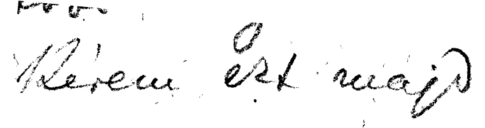

In [ ]:
path = '/content/drive/MyDrive/DataAug/Data/source/images/' 
idx = random.randint(0,len(df))
print(df['text'][idx])
print(df['file_name'][idx])
Image.open(path + df['file_name'][idx]).convert("RGB")

Let's run the above function on some samples

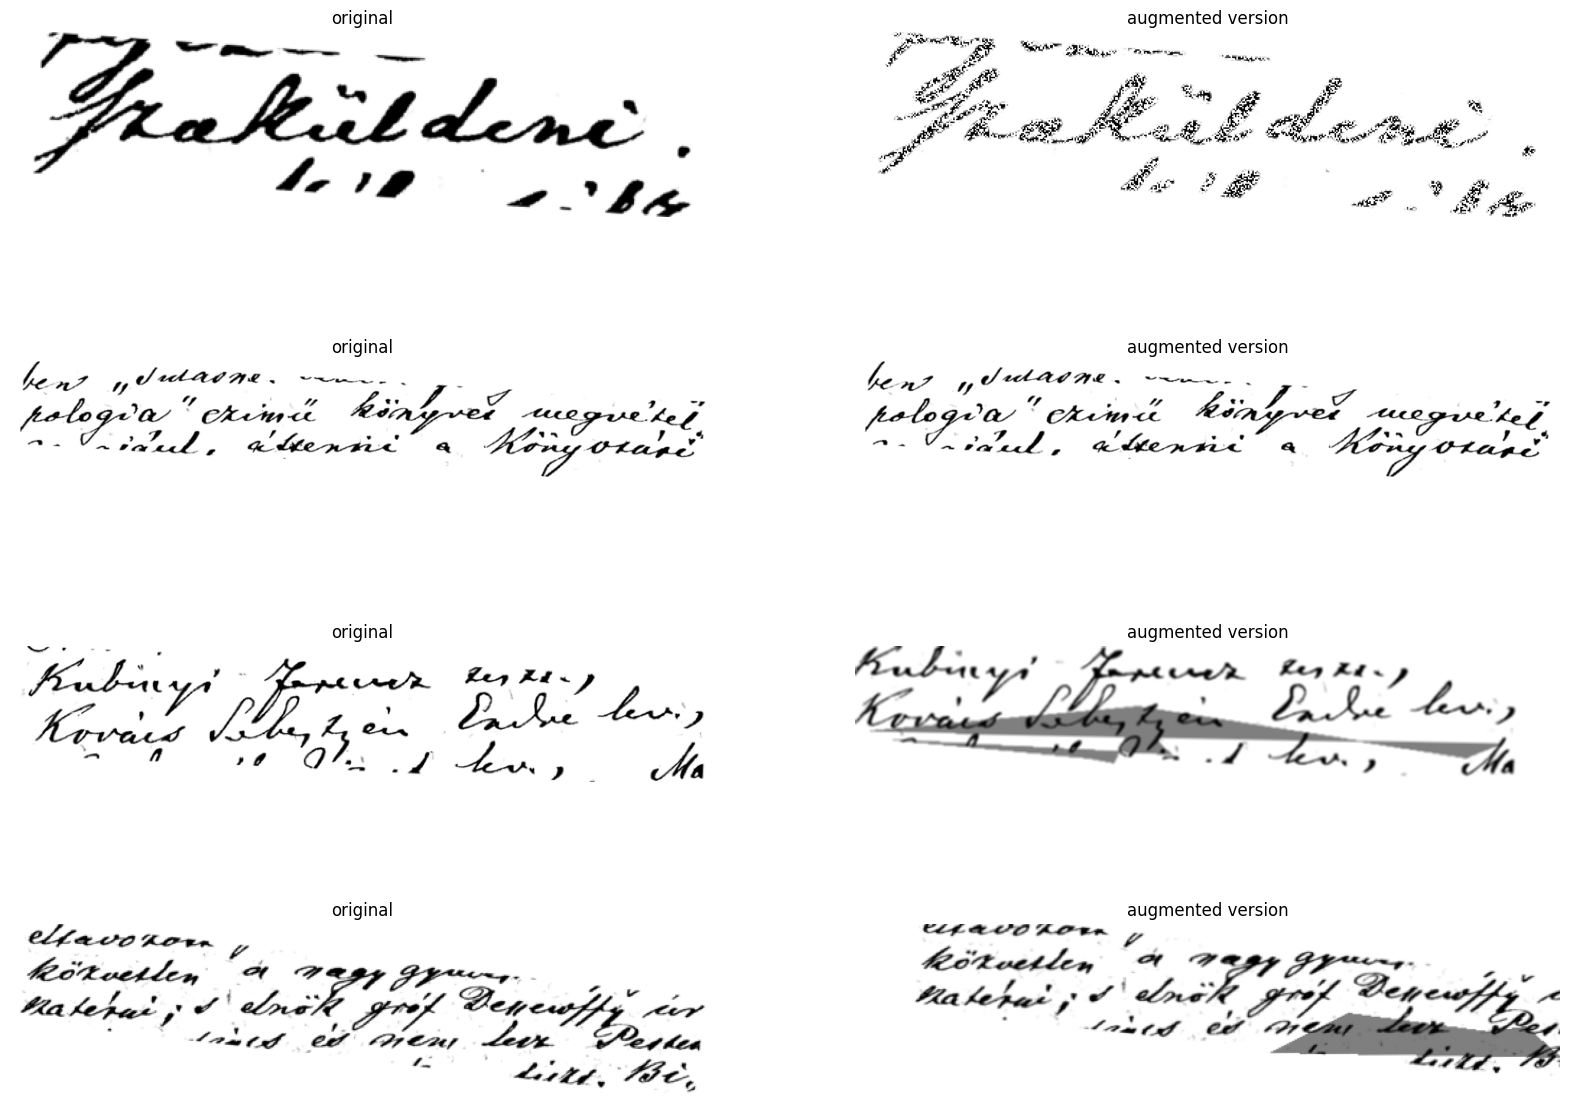

In [ ]:
#take sample and do augmentations
sample_amount =  8
# image1 = Image.open(requests.get('https://neontreebot.be/data/prefernot.jpg', stream=True).raw).convert("RGB")

# to do choose randomly
idx1 = random.randint(0,len(df))
idx2 = random.randint(0,len(df))
idx3 = random.randint(0,len(df))
idx4 = random.randint(0,len(df))


image1 = Image.open(path + df['file_name'][idx1]).convert("RGB")
image2 = Image.open(path + df['file_name'][idx2]).convert("RGB")
image3 = Image.open(path + df['file_name'][idx3]).convert("RGB")
image4 = Image.open(path + df['file_name'][idx4]).convert("RGB")
plt.figure(figsize=(20,30))
i = 1
plt.subplot(sample_amount, 2, i).imshow(image1)
plt.subplot(sample_amount, 2, i).set_title('original')
plt.subplot(sample_amount, 2, i).set_axis_off() 
plt.subplot(sample_amount, 2, i + 1).imshow(augment_img(image1))
plt.subplot(sample_amount, 2, i + 1).set_title('augmented version')
plt.subplot(sample_amount, 2, i + 1).set_axis_off() 
i = 3
plt.subplot(sample_amount, 2, i).imshow(image2)
plt.subplot(sample_amount, 2, i).set_title('original')
plt.subplot(sample_amount, 2, i).set_axis_off() 
plt.subplot(sample_amount, 2, i + 1).imshow(augment_img(image2))
plt.subplot(sample_amount, 2, i + 1).set_title('augmented version')
plt.subplot(sample_amount, 2, i + 1).set_axis_off()
i = 5
plt.subplot(sample_amount, 2, i).imshow(image3)
plt.subplot(sample_amount, 2, i).set_title('original')
plt.subplot(sample_amount, 2, i).set_axis_off() 
plt.subplot(sample_amount, 2, i + 1).imshow(augment_img(image3))
plt.subplot(sample_amount, 2, i + 1).set_title('augmented version')
plt.subplot(sample_amount, 2, i + 1).set_axis_off() 
i = 7
plt.subplot(sample_amount, 2, i).imshow(image4)
plt.subplot(sample_amount, 2, i).set_title('original')
plt.subplot(sample_amount, 2, i).set_axis_off() 
plt.subplot(sample_amount, 2, i + 1).imshow(augment_img(image4))
plt.subplot(sample_amount, 2, i + 1).set_title('augmented version')
plt.subplot(sample_amount, 2, i + 1).set_axis_off() 

## Create a new folder to store the augmented images and the labels file.

In [ ]:
aug_imgs = f'{working_dir}destination/aug_imgs'
if not os.path.exists(aug_imgs):
    os.makedirs(aug_imgs)

In [ ]:
# output_imgs_folder = '/content/drive/MyDrive/DataAug/output_folder/imgs'
# if not os.path.exists(output_imgs_folder):
#     os.makedirs(output_imgs_folder)

## Create a new dataframe to store the new file names and corresponding labels.

In [ ]:
new_df = pd.DataFrame(columns=['file_name', 'text'])
new_df

,file_name,text


In [ ]:
# To save the augmented images in the output_imgs_folder directory and create a new new_labels.jsonl file with the updated file names, you can modify the for loop as follows:
from tqdm import tqdm
sample_amount =  4
new_labels_path = os.path.join(aug_imgs, 'new_labels.jsonl')
# new_labels_path = f'{working_dir}destination'
print(new_labels_path)
# create new_labels.jsonl file
with open(new_labels_path, 'w') as outfile:
  # to add taqd to see progress
  for idx in tqdm(range(len(df))):
    image_path = os.path.join(path, df['file_name'][idx])
    image = Image.open(image_path).convert("RGB")
    for i in range(sample_amount):
      augmented_image = augment_img(image)
      augmented_image_path = os.path.join(aug_imgs, 'aug_' + str(idx * sample_amount + i) + '.jpg')
      augmented_image.save(augmented_image_path)
      # write updated label to new_labels.jsonl file
      outfile.write('{"file_name": "' + os.path.basename(augmented_image_path) + '", "text": "' + df['text'][idx] + '"}\n')

/content/drive/MyDrive/DataAug/Data/destination/aug_imgs/new_labels.jsonl


100%|██████████| 5697/5697 [50:32<00:00,  1.88it/s]


In [ ]:
# capture source file 
source = r'/content/drive/MyDrive/DataAug/Data/destination/aug_imgs/new_labels.jsonl'
# capture destnation file 
destination = r'/content/drive/MyDrive/DataAug/Data/destination/'
shutil.move(source, destination)

'/content/drive/MyDrive/DataAug/Data/destination/new_labels.jsonl'

## Concatenate (source + augumentation)

In [ ]:
output_dir = f'{working_dir}output_dir'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
images_dir = f'{output_dir}/images_dir'
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

### 1- make one images folder

In [ ]:
def move_imgs(source,destination,state ='copy'):
  print('The data process has started :')
  print(f'We will process {len(os.listdir(source_folder))} fiels: from {source_folder}   dir')
  time.sleep(3)
  # fetch all files
  for file_name in os.listdir(source_folder):
      # construct full file path
      source = source_folder + file_name
      destination = destination_folder + file_name  
      # move only files (cut)
      if os.path.isfile(source):
        if state=='copy':
            shutil.copyfile(source, destination)  # CTRL + C
        elif state== 'move': 
            shutil.move(source, destination)  # ctrl + X
  time.sleep(3)
  print(f'number of images after processing {len(os.listdir(destination_folder))}  fiels: to {destination_folder}   dir')

### 1.1 Moving source image 

In [ ]:
source_folder = r"/content/drive/MyDrive/DataAug/Data/source/images/"
destination_folder = r"/content/drive/MyDrive/DataAug/Data/output_dir/images_dir/"
move_imgs(source_folder,destination_folder,'copy')

The data process has started :
We will process 5997 fiels: from /content/drive/MyDrive/DataAug/Data/source/images/   dir
number of images after processing 5997  fiels: to /content/drive/MyDrive/DataAug/Data/output_dir/images_dir/   dir


In [ ]:
# def move_imgs(source,destination):

#   print('The data Moving has started :')
#   print(f'We will Moving {len(os.listdir(source_folder))} fiels: from {source_folder}   dir')
#   time.sleep(3)
#   # fetch all files
#   for file_name in os.listdir(source_folder):
#       # construct full file path
#       source = source_folder + file_name
#       destination = destination_folder + file_name  
#       # move only files (cut)
#       if os.path.isfile(source):
#           shutil.move(source, destination) # ctrl + X
#           # shutil.copyfile(source, destination) # CTRL + C
#           # print('Moved:', file_name)
#   time.sleep(3)
#   print(f'number of images after Moveing {len(os.listdir(destination_folder))}  fiels: to {destination_folder}   dir')

### 1.2 Move Augumented image 

In [ ]:
source_folder = r"/content/drive/MyDrive/DataAug/Data/destination/aug_imgs/"
destination_folder = r"/content/drive/MyDrive/DataAug/Data/output_dir/images_dir/"
move_imgs(source_folder,destination_folder,'move')

The data process has started :
We will process 22788 fiels: from /content/drive/MyDrive/DataAug/Data/destination/aug_imgs/   dir
number of images after processing 28785  fiels: to /content/drive/MyDrive/DataAug/Data/output_dir/images_dir/   dir


In [ ]:
source_folder = r"/content/drive/MyDrive/DataAug/Data/destination/aug_imgs/"
destination_folder = r"/content/drive/MyDrive/DataAug/Data/output_dir/images_dir/"
move_imgs(source_folder,destination_folder,'move')

The data process has started :
We will process 60 fiels: from /content/drive/MyDrive/DataAug/Data/destination/aug_imgs/   dir
number of images after processing 28770  fiels: to /content/drive/MyDrive/DataAug/Data/output_dir/images_dir/   dir


- It seems there are some missing data we have 5997 * 4 it should be 23988 but we can see it is 22788 

## 2 - Make one dataframe file 

In [ ]:
output_dir   = f'{working_dir}output_dir/'                     # path to merge df(s)
input_file1  = f'{working_dir}source/train.jsonl'              # path to df1
input_file2  = f'{working_dir}destination/new_labels.jsonl'    # path to df2 

def load_jsonl(path):
    return pd.read_json(
                        path_or_buf = f'{path}',
                        lines=True) 

dir_ = [
         input_file1 ,
         input_file1 ,
        ]
        
frames = [load_jsonl(path) for path in dir_]
# for f in frames:
#     print(f.columns)
print(len(frames))
resulting_df = pd.concat(frames,ignore_index=True)
print(resulting_df.head())

# Converting dataframe to jsonl
time.sleep(3)
reddit = resulting_df.to_dict(orient= "records")
print(type(reddit) , len(reddit))
# we have list of dict[{},{},{}]
with open(f"{output_dir}aug_s_labels.jsonl","w") as f:
    for line in reddit:
        f.write(json.dumps(line,ensure_ascii=False) + "\n")

2
                          file_name                         text
0  RALK987_1865_817_120_001-001.jpg         Csengery Antal r. t.
1  RALK987_1865_817_120_001-002.jpg           Szabó József l. t.
2  RALK987_1865_817_120_001-003.jpg               Tekintetes úr!
3  RALK987_1865_817_120_001-004.jpg  Szilágyi István lev. tagnak
4  RALK987_1865_817_120_001-005.jpg   az e havi a folyó hó 22-én
<class 'list'> 11394


In [ ]:
# !rm -r '/content/output_folder'

# Functions to do 1 augmentation only
may be useful for your testing. I used it for generating image samples for the medium article

**morphological alterations**

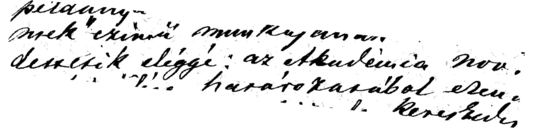

In [ ]:
# Read an image 
path = '/content/drive/MyDrive/TrsOCR_utorial/training-data-ex/img/' # RALK987_1865_817_120_001-018.jpg
image = Image.open(path + df['file_name'][0]).convert("RGB")
image

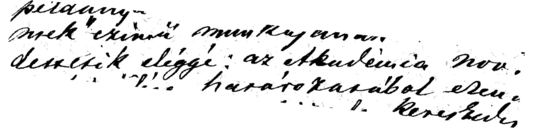

In [ ]:
img = np.asarray(image)     #convert to numpy
image = Image.fromarray(img)
image

In [ ]:
def augment_img_dilate(img):
  img = np.asarray(img)     #convert to numpy
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,1))
  # dilation because the image is not inverted
  img = cv2.erode(img, kernel, iterations=random.randint(2, 4))
  image = Image.fromarray(img)   
  return image

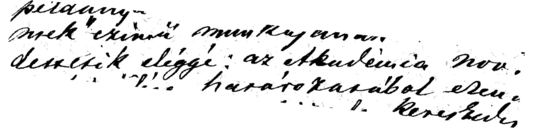

In [ ]:
augment_img_dilate(image)

In [ ]:
def augment_img_erode(img):
  img = np.asarray(img)     #convert to numpy
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
  # erosion because the image is not inverted
  img = cv2.dilate(img, kernel,iterations=random.randint(1,1))
  image = Image.fromarray(img)   
  return image

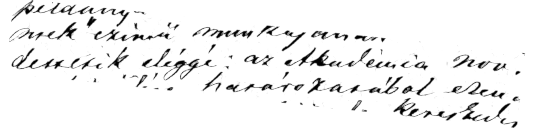

In [ ]:
augment_img_erode(image)

**black pixel noise**

In [ ]:
def augment_img_RandomRain_black(img):
  img = np.asarray(img)     # convert to numpy
  transform = A.Compose([
  #add black pixels noise: RandomRain
  A.RandomRain(brightness_coefficient=.9, drop_length=1, drop_width=1, drop_color = (0, 0, 0), blur_value=2, rain_type = 'drizzle', p=1)
    ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

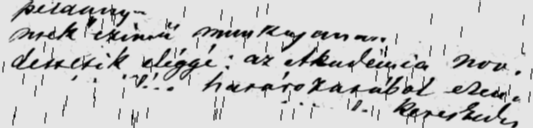

In [ ]:
augment_img_RandomRain_black(image)

In [ ]:
def augment_img_RandomShadow(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add black pixels noise: RandomShadow
  A.RandomShadow(p=1)
  #A.PixelDropout(p=1),
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

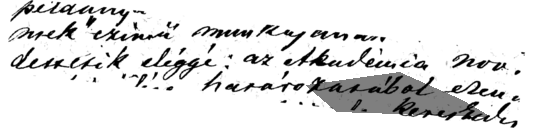

In [ ]:
augment_img_RandomShadow(image)

In [ ]:
def augment_img_PixelDropout_black(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add black pixels noise: PixelDropout
  A.PixelDropout(p=1)
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

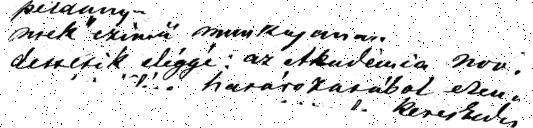

In [ ]:
augment_img_PixelDropout_black(image)

**white pixel noise**

In [ ]:
def augment_img_RandomRain_white(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add white pixels noise: RandomRain
  A.RandomRain(brightness_coefficient=1.0, drop_length=2, drop_width=2, drop_color = (253, 255, 205), blur_value=1, rain_type = None, p=1)
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image              

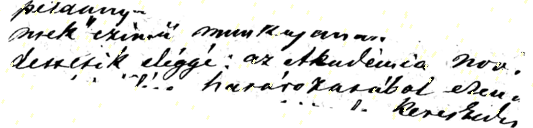

In [ ]:
augment_img_RandomRain_white(image)

In [ ]:
def augment_img_PixelDropout_white(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add white pixels noise: PixelDropout
  A.PixelDropout(dropout_prob=0.4,drop_value=250,p=1)
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

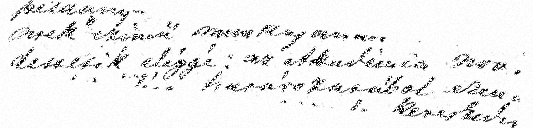

In [ ]:
augment_img_PixelDropout_white(image)

**transformations**

In [ ]:
def augment_img_ShiftScaleRotate(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  #add white pixels noise: PixelDropout
  A.OneOf([
            A.ShiftScaleRotate(shift_limit=0, scale_limit=0.2, rotate_limit=2, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0, rotate_limit=3, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.1, rotate_limit=4, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),  
            A.Affine(shear=random.randint(-5, 5),mode=cv2.BORDER_CONSTANT, cval=(255,255,255), p=1)          
       ], p=1)
    ])

  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

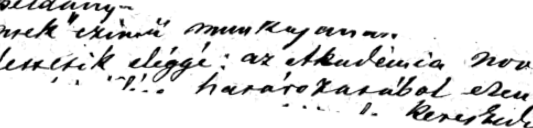

In [ ]:
augment_img_ShiftScaleRotate(image)

In [ ]:
def augment_img_Blur(img):
  img = np.asarray(img)     #convert to numpy
  transform = A.Compose([
  A.Blur(blur_limit=3,p=1),
   ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image

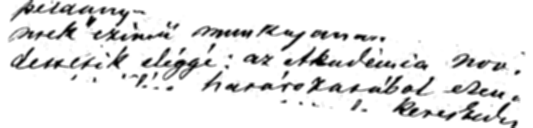

In [ ]:
augment_img_Blur(image)